# HW2 Q4 Programming Part: Combined Cycle Power Plant Data Set

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## (a) Download Data Set


In [33]:
df=pd.read_excel("Folds5x2_pp.xlsx")
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


## (b) Exploring the data:

### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [34]:
print("There are ",df.shape[0]," rows and ",df.shape[1]," columns.")
print("Columns are ",list(df.columns))


There are  9568  rows and  5  columns.
Columns are  ['AT', 'V', 'AP', 'RH', 'PE']


Each row represents an instance, which is the data collected from the Combined Cycle Power Plant over six years when the plant was operating at full load.  

Except the last column, each column represents a feature, including the hourly average ambient variables: Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP) and Relative Humidity (RH). The last column represent the label, which is the net hourly electrical energy output (PE) of the plant.

### ii. Make pairwise scatterplots (scatter matrix) of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

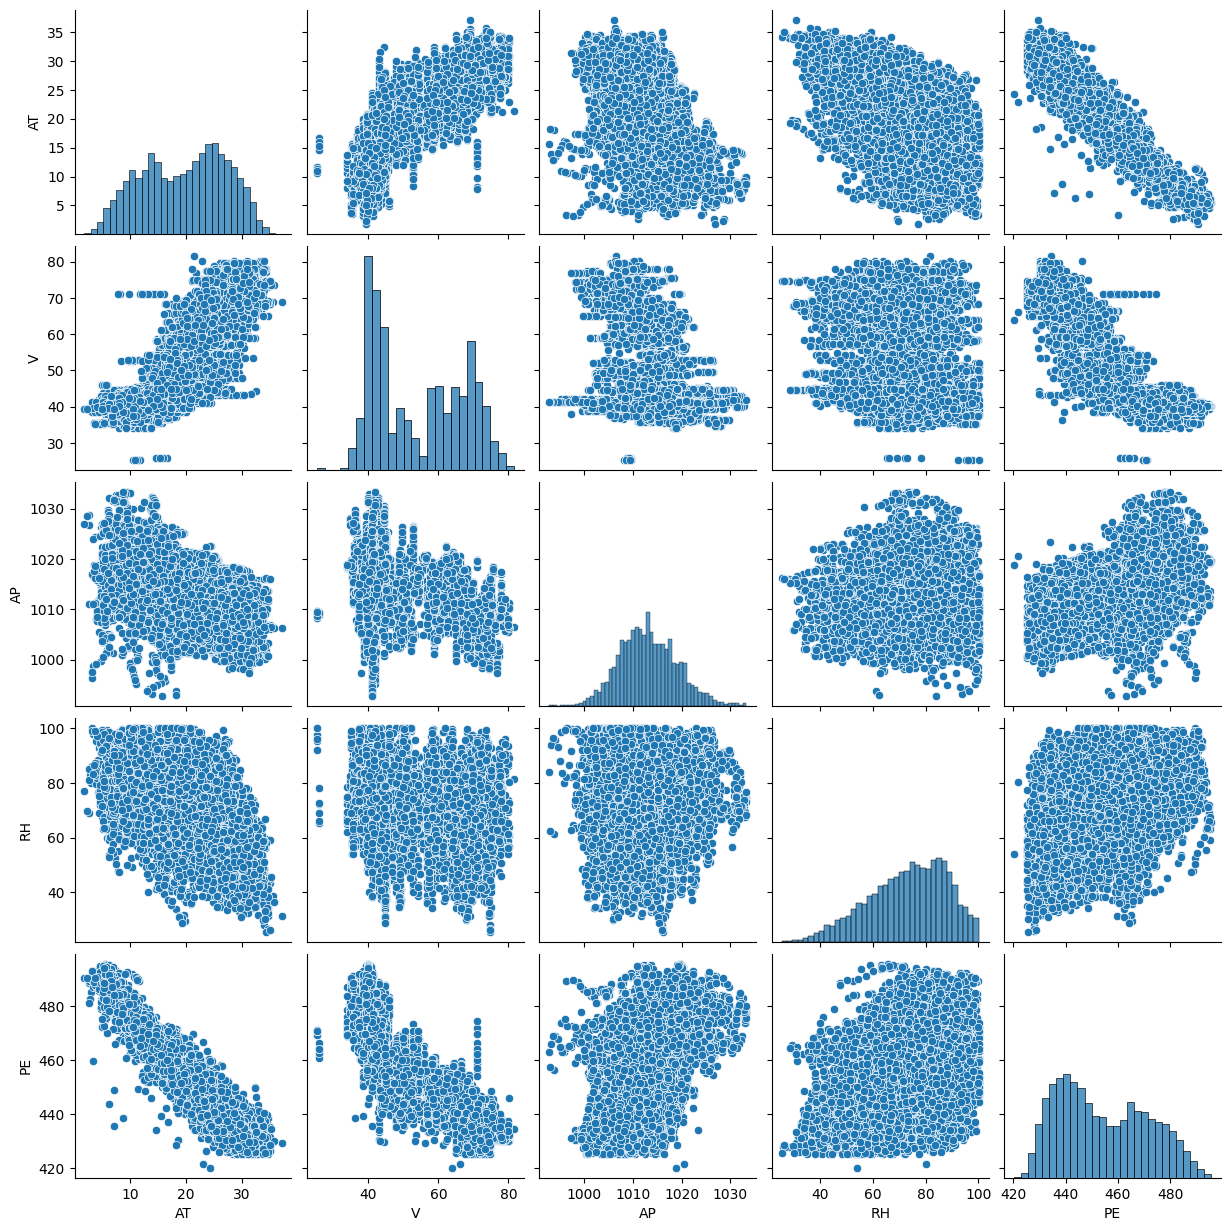

In [35]:
sns.pairplot(df)
plt.show()

**Findings**

There appears to be
- a positibe correlation between AT and V;
- a negative correlation between AT and PE;
- a negative correlation between V and PE;

For the other variables, the correlations are not obvious.


### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [36]:
df_summary=df.describe().T
df_summary['range']=df_summary['max']=df_summary['min']
df_summary['interquartile_range']=df_summary['75%']-df_summary['25%']
print(df_summary)

     count         mean        std     min        25%       50%      75%  \
AT  9568.0    19.651231   7.452473    1.81    13.5100    20.345    25.72   
V   9568.0    54.305804  12.707893   25.36    41.7400    52.080    66.54   
AP  9568.0  1013.259078   5.938784  992.89  1009.1000  1012.940  1017.26   
RH  9568.0    73.308978  14.600269   25.56    63.3275    74.975    84.83   
PE  9568.0   454.365009  17.066995  420.26   439.7500   451.550   468.43   

       max   range  interquartile_range  
AT    1.81    1.81              12.2100  
V    25.36   25.36              24.8000  
AP  992.89  992.89               8.1600  
RH   25.56   25.56              21.5025  
PE  420.26  420.26              28.6800  


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

### i. Fit simple linear models

In [37]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics

In [38]:
columns_list=list(df.columns)
X=df.drop(columns=['PE'])
y=df['PE']

for feature in columns_list[:-1]:
  predictor=df[feature]
  predictor=sm.add_constant(predictor)
  #print(predictor.head())

  model_single_feature_OLS=sm.OLS(df['PE'],predictor).fit()
  print(feature," vs  PE")
  print(model_single_feature_OLS.summary(),"\n\n\n")


AT  vs  PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:35   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.2

We can focus on p-value and R-squared value:
- All four features have low p-values (< 0.05), which means they all have a significant association with **PE**.
- The R-squared values of **AT** and **V** are relatively high (0.899 and 0.757, respectively) indicating that they have a strong negtive effect on **PE**.
- The R-squared values of **AP** and **RH** are relatively low (0.269 and 0.152 respectively) indicating that they have a weak positive effect on **PE**.

### ii. Creat regression plots to back up my assertions

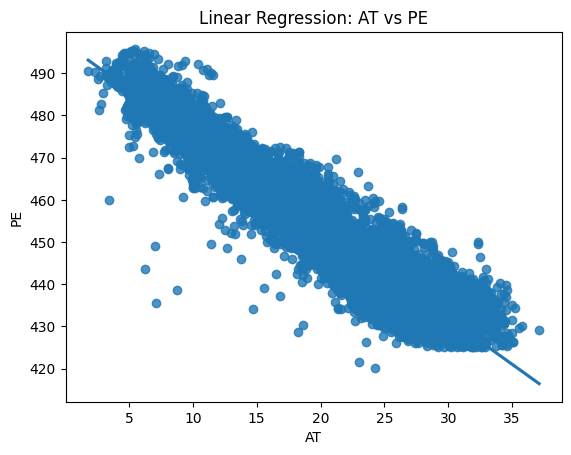

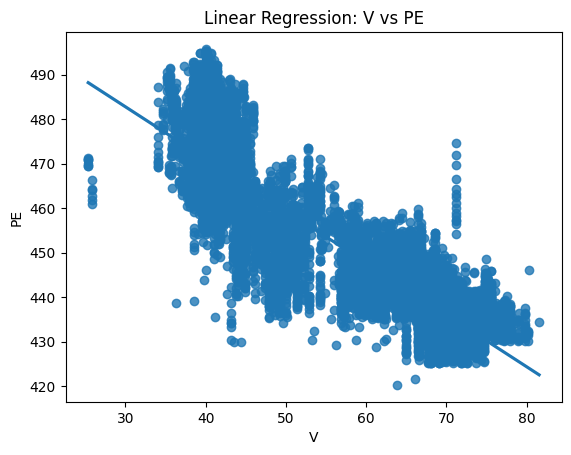

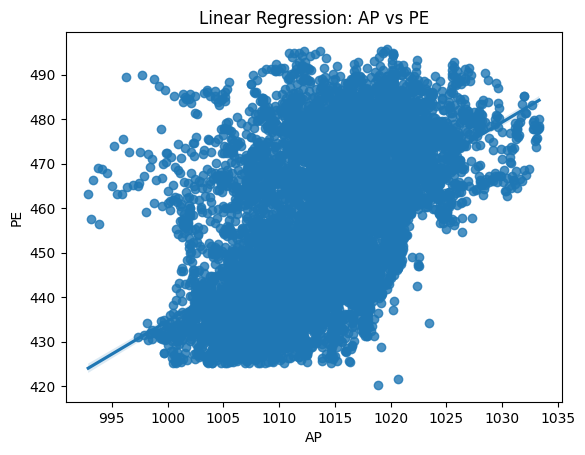

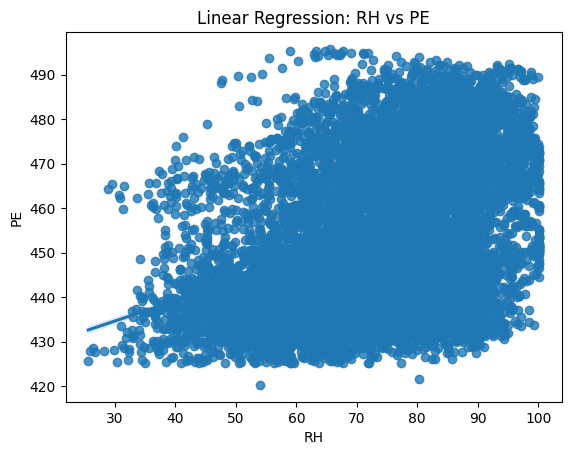

In [39]:
for feature in columns_list[:-1]:
  sns.regplot(x=df[feature], y=df['PE'])
  plt.xlabel(feature)
  plt.ylabel('PE')
  plt.title(f"Linear Regression: {feature} vs PE")
  plt.show();

### iii. Creating boxplot to find whether there have ouliers

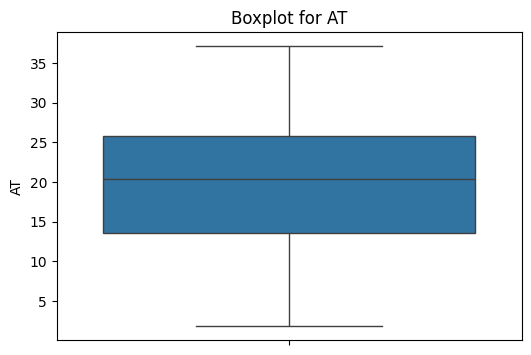

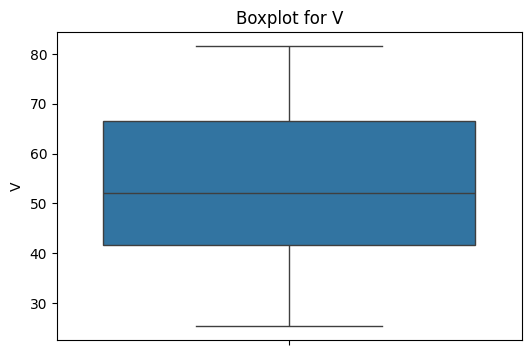

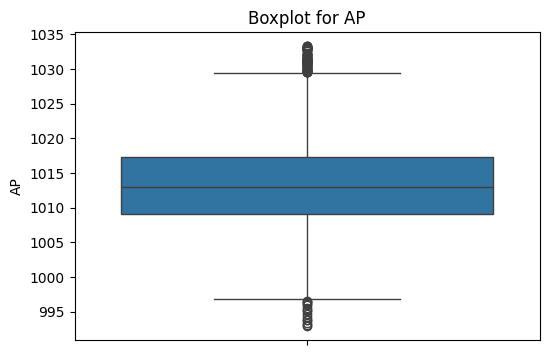

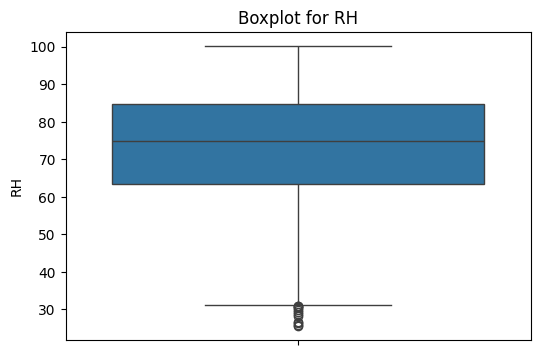

In [40]:
for feature in columns_list[:-1]:
  plt.figure(figsize=(6, 4))
  sns.boxplot(data=df,y=feature)
  plt.title(f"Boxplot for {feature}")
  plt.show()


There are some outliers in **AP** and **RH**, if we consider datas that beyond **$[$ first quartile $- 1.5*$ IQR, third quartile $+ 1.5*$ IQR $]$** are outliers.

### iv. Removing the outliers to improve the regression

In [41]:
AP_min=df_summary.loc['AP','25%']-1.5*df_summary.loc['AP','interquartile_range']
AP_max=df_summary.loc['AP','75%']+1.5*df_summary.loc['AP','interquartile_range']
RH_min=df_summary.loc['RH','25%']-1.5*df_summary.loc['RH','interquartile_range']

df_without_outliers=df[(df['AP']>=AP_min) & (df['AP']<=AP_max) & (df['RH']>=RH_min)]
print(df_without_outliers)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9468 rows x 5 columns]


In [42]:
for feature in columns_list[:-1]:
  predictor=df_without_outliers[feature]
  predictor=sm.add_constant(predictor)

  model_single_feature_OLS=sm.OLS(df_without_outliers['PE'],predictor).fit()
  print("After removing outliers: ",feature," vs  PE")
  print(model_single_feature_OLS.summary(),"\n\n\n")


After removing outliers:  AT  vs  PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                 8.319e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -29476.
No. Observations:                9468   AIC:                         5.896e+04
Df Residuals:                    9466   BIC:                         5.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        49

| Predictor  | \( R^2 \) (Before) | \( R^2 \) (After) | p-value (Before) | p-value (After) | Significant Change |
|------------|------------------|------------------|------------------|------------------|-----------------|
| **AT vs PE** | 0.899            | 0.898            | 0.000            | 0.000            |  No |
| **V vs PE**  | 0.757            | 0.755            | 0.000            | 0.000            |  No |
| **AP vs PE** | 0.269            | 0.272            | 0.000            | 0.000            |  No |
| **RH vs PE** | 0.152            | 0.151            | 0.000            | 0.000            |  No |


Since the p-values remain significant and the R-squared values show no significant change after removing outliers, the impact of outliers on the model is minimal. Therefore, removing them is not necessary.

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [43]:
X=df.drop(columns=['PE'])
y=df['PE']
X=sm.add_constant(X)
model_multi_feature_OLS=sm.OLS(y,X).fit()
print(model_multi_feature_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

All four predictors (AT, V, AP, RH) are statistically significant (p < 0.05), so we reject H0 for each predictor.

## (e) How do your results from 4c compare to your results from 4d? Create a plot displaying the univariate regression coefficients from 4c on the x-axis, and the multiple regression coefficients from 4d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

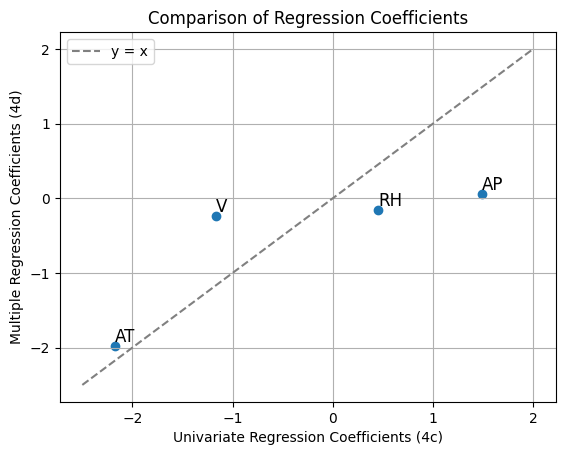

In [44]:
# Recording coefficients from 4c and 4d
univariate_coeffs = {
    "AT": -2.1713,
    "V": -1.1681,
    "AP": 1.4899,
    "RH": 0.4557
}

multiple_coeffs = {
    "AT": -1.9775,
    "V": -0.2339,
    "AP": 0.0621,
    "RH": -0.1581
}

plt.scatter(univariate_coeffs.values(), multiple_coeffs.values())
plt.plot([-2.5, 2], [-2.5, 2], linestyle='dashed', color='gray', label="y = x")

for predictor in univariate_coeffs.keys():
    plt.text(univariate_coeffs[predictor], multiple_coeffs[predictor], predictor, fontsize=12, verticalalignment='bottom')

plt.xlabel("Univariate Regression Coefficients (4c)")
plt.ylabel("Multiple Regression Coefficients (4d)")
plt.title("Comparison of Regression Coefficients")
plt.legend()
plt.grid()
plt.show()


## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
>### Y = β0 + β1X + β2X2 + β3X3 + ϵ


In [45]:
for feature in columns_list[:-1]:
  df_single_nonlinear=pd.DataFrame({
    "X":df[feature],
    "X^2":df[feature]**2,
    "X^3":df[feature]**3
  })
  df_single_nonlinear=sm.add_constant(df_single_nonlinear)

  model_single_nonlinear_OLS=sm.OLS(df['PE'],df_single_nonlinear).fit()
  print(feature," vs  PE")
  print(model_single_nonlinear_OLS.summary(),"\n\n\n")


AT  vs  PE
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.2

**For AT, AP, RH:**
- They have all polynomial terms statistically significant (p < 0.05).
- This suggests a strong nonlinear relationship with the response variable.

**For V:**
- X and X^3 significant (p < 0.05)
- X^2 not significant (p > 0.05)
- This suggests a nonlinear relationship, but not necessarily a simple quadratic one.

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [46]:
df_interaction=df.drop(columns=['PE'])
for col1 in columns_list[:-1]:
  for col2 in columns_list[:-1]:
    if col1 != col2 and columns_list.index(col1)>columns_list.index(col2):
        df_interaction[f"{col1}*{col2}"] = df[col1] * df[col2]
print(df_interaction)

         AT      V       AP     RH       V*AT       AP*AT        AP*V  \
0     14.96  41.76  1024.07  73.17   624.7296  15320.0872  42765.1632   
1     25.18  62.96  1020.04  59.08  1585.3328  25684.6072  64221.7184   
2      5.11  39.40  1012.16  92.14   201.3340   5172.1376  39879.1040   
3     20.86  57.32  1010.24  76.64  1195.6952  21073.6064  57906.9568   
4     10.82  37.50  1009.23  96.62   405.7500  10919.8686  37846.1250   
...     ...    ...      ...    ...        ...         ...         ...   
9563  16.65  49.69  1014.01  91.00   827.3385  16883.2665  50386.1569   
9564  13.19  39.18  1023.67  66.78   516.7842  13502.2073  40107.3906   
9565  31.32  74.33  1012.92  36.48  2328.0156  31724.6544  75290.3436   
9566  24.48  69.45  1013.86  62.39  1700.1360  24819.2928  70412.5770   
9567  21.60  62.52  1017.23  67.87  1350.4320  21972.1680  63597.2196   

          RH*AT       RH*V       RH*AP  
0     1094.6232  3055.5792  74931.2019  
1     1487.6344  3719.6768  60263.9632  


In [47]:
df_interaction=sm.add_constant(df_interaction)
model_interaction_OLS=sm.OLS(df['PE'],df_interaction).fit()
print(model_interaction_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

- We find that **V*AT**, **AP*AT**, **AP*V**, **RH*AT**, **RH*AP** have p-values less than 0.05, which means that there are significant evidences to reject their null hypothesis. There are evidences of association of interactions which are mentioned before with the response.
- **AP*AT** and **RH*V** do not show significant effects.

## (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms XiXj as well as quadratic nonlinearities Xj^2, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

### i. Baseline model

In [48]:
X=df.drop(columns=['PE'])
y=df['PE']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
print(X_train.head())

      const     AT      V       AP     RH
2794    1.0  11.55  40.60  1014.44  87.06
5990    1.0  25.87  63.47  1011.54  65.45
6771    1.0  23.66  62.08  1022.42  64.13
5409    1.0  14.36  41.26  1021.16  73.43
6959    1.0  32.28  75.33  1002.14  62.49


In [49]:
model_baseline_OLS=sm.OLS(y_train,X_train).fit()
print(model_baseline_OLS.summary())

y_pred_train_baseline=model_baseline_OLS.predict(X_train)
MSE_train_baseline=metrics.mean_squared_error(y_train,y_pred_train_baseline)

y_pred_test_baseline=model_baseline_OLS.predict(X_test)
MSE_test_baseline=metrics.mean_squared_error(y_test,y_pred_test_baseline)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.258e+04
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -19529.
No. Observations:                6697   AIC:                         3.907e+04
Df Residuals:                    6692   BIC:                         3.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        469.2501     11.336     41.394      0.0

### ii. Add all possible terms

In [50]:
X_train_all=X_train
X_test_all=X_test
for col1 in columns_list[:-1]:
  X_train_all[f"{col1}^2"]=X_train_all[col1]**2
  X_test_all[f"{col1}^2"]=X_test_all[col1]**2
  for col2 in columns_list[:-1]:
    if col1 != col2 and columns_list.index(col1)>columns_list.index(col2):
        X_train_all[f"{col1}*{col2}"] = X_train_all[col1] * X_train_all[col2]
        X_test_all[f"{col1}*{col2}"] = X_test_all[col1] * X_test_all[col2]

X_train_all=sm.add_constant(X_train_all)
X_test_all=sm.add_constant(X_test_all)
print(X_train_all.head())

      const     AT      V       AP     RH       AT^2        V^2       V*AT  \
2794    1.0  11.55  40.60  1014.44  87.06   133.4025  1648.3600   468.9300   
5990    1.0  25.87  63.47  1011.54  65.45   669.2569  4028.4409  1641.9689   
6771    1.0  23.66  62.08  1022.42  64.13   559.7956  3853.9264  1468.8128   
5409    1.0  14.36  41.26  1021.16  73.43   206.2096  1702.3876   592.4936   
6959    1.0  32.28  75.33  1002.14  62.49  1041.9984  5674.6089  2431.6524   

              AP^2       AP*AT        AP*V       RH^2      RH*AT       RH*V  \
2794  1.029089e+06  11716.7820  41186.2640  7579.4436  1005.5430  3534.6360   
5990  1.023213e+06  26168.5398  64202.4438  4283.7025  1693.1915  4154.1115   
6771  1.045343e+06  24190.4572  63471.8336  4112.6569  1517.3158  3981.1904   
5409  1.042768e+06  14663.8576  42133.0616  5391.9649  1054.4548  3029.7218   
6959  1.004285e+06  32349.0792  75491.2062  3905.0001  2017.1772  4707.3717   

           RH*AP  
2794  88317.1464  
5990  66205.2930  

In [51]:
model_all_OLS=sm.OLS(y_train,X_train_all).fit()
print(model_all_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     7508.
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -19049.
No. Observations:                6697   AIC:                         3.813e+04
Df Residuals:                    6682   BIC:                         3.823e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7292.6192   1410.337     -5.171      0.0

We find that the following varibales have p-value larger than 0.05, which should be removed: **AT**, **V^2**, **AP*AT**, **RH*V**

### iii. remove insignificant terms

In [52]:
X_train_improve=X_train_all.drop(columns=['AT','V^2','AP*AT','RH*V'])
X_test_improve=X_test_all.drop(columns=['AT','V^2','AP*AT','RH*V'])
print(X_train_improve.head())

      const      V       AP     RH       AT^2       V*AT          AP^2  \
2794    1.0  40.60  1014.44  87.06   133.4025   468.9300  1.029089e+06   
5990    1.0  63.47  1011.54  65.45   669.2569  1641.9689  1.023213e+06   
6771    1.0  62.08  1022.42  64.13   559.7956  1468.8128  1.045343e+06   
5409    1.0  41.26  1021.16  73.43   206.2096   592.4936  1.042768e+06   
6959    1.0  75.33  1002.14  62.49  1041.9984  2431.6524  1.004285e+06   

            AP*V       RH^2      RH*AT       RH*AP  
2794  41186.2640  7579.4436  1005.5430  88317.1464  
5990  64202.4438  4283.7025  1693.1915  66205.2930  
6771  63471.8336  4112.6569  1517.3158  65567.7946  
5409  42133.0616  5391.9649  1054.4548  74983.7788  
6959  75491.2062  3905.0001  2017.1772  62623.7286  


In [53]:
model_improve_OLS=sm.OLS(y_train,X_train_improve).fit()
print(model_improve_OLS.summary())

y_pred_train_improve=model_improve_OLS.predict(X_train_improve)
MSE_train_improve=metrics.mean_squared_error(y_train,y_pred_train_improve)

y_pred_test_improve=model_improve_OLS.predict(X_test_improve)
MSE_test_improve=metrics.mean_squared_error(y_test,y_pred_test_improve)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     9618.
Date:                Sat, 22 Feb 2025   Prob (F-statistic):               0.00
Time:                        05:58:38   Log-Likelihood:                -19330.
No. Observations:                6697   AIC:                         3.868e+04
Df Residuals:                    6686   BIC:                         3.876e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -1.1e+04   1264.951     -8.699      0.0

### iv. compare train and test MSEs

In [54]:
print("Train MSE in Baseline Model: ", MSE_train_baseline)
print("Test  MSE in Baseline Model: ", MSE_test_baseline)
print("\nTrain MSE in improved Model: ", MSE_train_improve)
print("Test  MSE in improved Model: ", MSE_test_improve)

Train MSE in Baseline Model:  19.96937644397568
Test  MSE in Baseline Model:  22.658769778031

Train MSE in improved Model:  18.818832545660033
Test  MSE in improved Model:  21.213809231246945


The Improved Model achieved lower train MSE and test MSE, suggesting that including nonlinear and interaction effects improves model accuracy.

## (i) Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1, 2, . . . , 100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

### i. raw features


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [56]:
train_errors_raw=[]
test_errors_raw=[]

for k in range(1,101):
  knn_raw=KNeighborsRegressor(n_neighbors=k)
  knn_raw.fit(X_train,y_train)

  y_train_pred_raw=knn_raw.predict(X_train)
  y_test_pred_raw=knn_raw.predict(X_test)

  train_errors_raw.append(mean_squared_error(y_train, y_train_pred_raw))
  test_errors_raw.append(mean_squared_error(y_test, y_test_pred_raw))


### ii. normalized features

In [57]:
scaler=StandardScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

train_errors_norm=[]
test_errors_norm=[]
for k in range(1,101):
  knn_norm=KNeighborsRegressor(n_neighbors=k)
  knn_norm.fit(X_train_norm,y_train)

  y_train_pred_norm=knn_norm.predict(X_train_norm)
  y_test_pred_norm=knn_norm.predict(X_test_norm)

  train_errors_norm.append(mean_squared_error(y_train, y_train_pred_norm))
  test_errors_norm.append(mean_squared_error(y_test, y_test_pred_norm))

### iii. plot the train and test errors

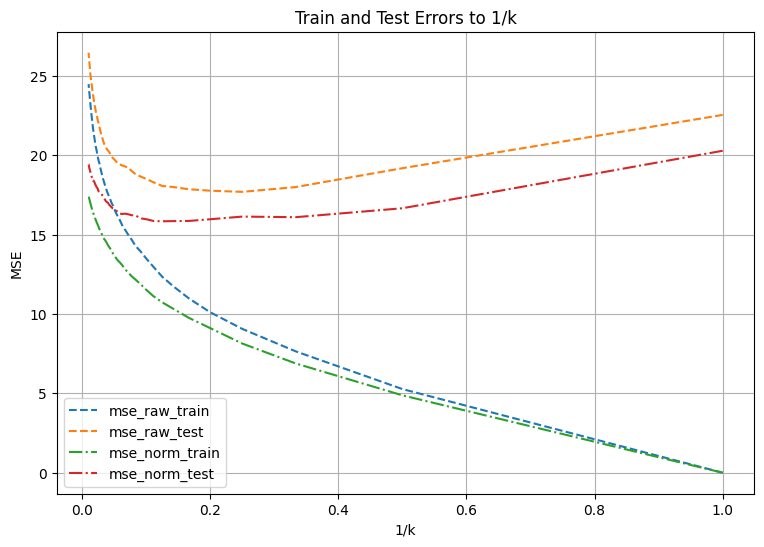

In [58]:
k_recip=[]
for i in range(1,101):
  k_recip.append(1/i)

plt.figure(figsize=(9, 6))
plt.plot(k_recip, train_errors_raw, label='mse_raw_train', linestyle='--')
plt.plot(k_recip, test_errors_raw, label='mse_raw_test', linestyle='--')
plt.plot(k_recip, train_errors_norm, label='mse_norm_train', linestyle='-.')
plt.plot(k_recip, test_errors_norm, label='mse_norm_test', linestyle='-.')
plt.title("Train and Test Errors to 1/k")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

### v. find best k for both models

In [59]:
print("For raw model:")
print("  best k is: ",test_errors_raw.index(min(test_errors_raw))+1)
print('  min mse is: ',min(test_errors_raw))

print("For normalized model:")
print("  best k is: ",test_errors_norm.index(min(test_errors_norm))+1)
print('  min mse is: ',min(test_errors_norm))

For raw model:
  best k is:  4
  min mse is:  17.699606115029606
For normalized model:
  best k is:  8
  min mse is:  15.84538283318095


## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [60]:
print('The best test error of the linear regression model is',min(MSE_test_baseline,MSE_test_improve))
print('The best test error of KNN regression model is', min(min(test_errors_raw),min(test_errors_norm)))

The best test error of the linear regression model is 21.213809231246945
The best test error of KNN regression model is 15.84538283318095


The best KNN's test error is 15.845 for normalized dataset when $k=8$. When k is larger than 8, the model underfits. When k is smaller than 8, the model overfits.

The best test error of KNN regression is smaller than that of the linear regression model, so KNN regression performs better in this case.

Possible Reasons:
- Linear Regression assumes a strict linear relationship, which may not fit the data well if there are nonlinear patterns.
- KNN can capture nonlinear relationships by making predictions based on nearest neighbors.